In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
# Remove the first column ('id')
data = data.iloc[:, 2:]

In [6]:
# Information about the DataFrame (data types, non-null counts, etc.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2142 non-null   object 
 1   manner_of_death          2142 non-null   object 
 2   armed                    2136 non-null   object 
 3   age                      2099 non-null   float64
 4   gender                   2141 non-null   object 
 5   race                     2039 non-null   object 
 6   city                     2142 non-null   object 
 7   state                    2142 non-null   object 
 8   signs_of_mental_illness  2142 non-null   bool   
 9   threat_level             2142 non-null   object 
 10  flee                     2106 non-null   object 
 11  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 171.7+ KB
None


We can see that 'date' column does not have the right data type. There are some NULL values. Lets see

In [7]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [8]:
print(data.date.min())
print(data.date.max())

2015-01-02 00:00:00
2017-02-28 00:00:00


In [9]:
# Remove rows where 'race' is missing
data = data.dropna(subset=['race', 'armed', 'age', 'flee'])

In [10]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Display the count of each race
print(race_counts)

race
W    1022
B     523
H     355
A      32
O      28
N      26
Name: count, dtype: int64


https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/

In [11]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Define total population for W and B
total_population_W = 248000000
total_population_B = 43000000

# Calculate percentages for W and B
percentage_W = (race_counts['W'] / total_population_W) * 100
percentage_B = (race_counts['B'] / total_population_B) * 100

# Create a DataFrame for percentages
race_percentages = pd.DataFrame({
    'Race': ['W', 'B'],
    'Total Population': [total_population_W, total_population_B],
    'Percentage': [percentage_W, percentage_B]
})

# Display the DataFrame
print(race_percentages)

  Race  Total Population  Percentage
0    W         248000000    0.000412
1    B          43000000    0.001216


In [14]:
# Count occurrences of each race
race_counts = data['race'].value_counts()

# Define total population for W and B
total_population_W = 248000000
total_population_B = 43000000

# Calculate percentages for W and B
NumberOFKILL_W = (race_counts['W'] / total_population_W) * 1000000
NumberOFKILL_B = (race_counts['B'] / total_population_B) * 1000000

# Create a DataFrame for percentages
race_percentages = pd.DataFrame({
    'Race': ['W', 'B'],
    'Killings per Million': [NumberOFKILL_W, NumberOFKILL_B]
})

# Display the DataFrame
print(race_percentages)

  Race  Killings per Million
0    W              4.120968
1    B             12.162791


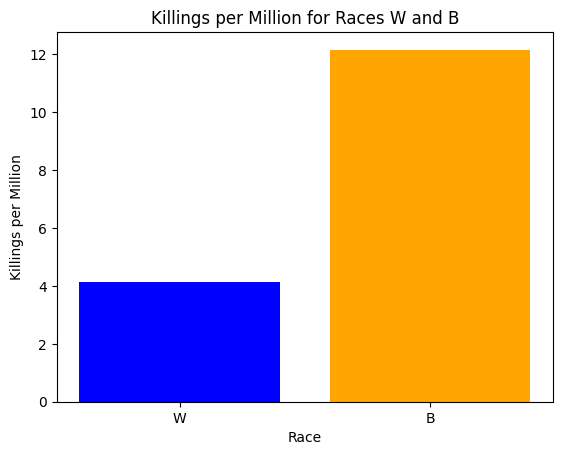

In [17]:
# Plotting the histogram
plt.bar(race_percentages['Race'], race_percentages['Killings per Million'], color=['blue', 'orange'])
plt.xlabel('Race')
plt.ylabel('Killings per Million')
plt.title('Killings per Million for Races W and B')
plt.show()